<a href="https://colab.research.google.com/github/FelipeRuanMarinheiro/Portifolio/blob/main/Practical_Challenge_(MBA_XPinc)_Business_Intelligence_Financial_Consulting_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio prático Modulo 2

In [ ]:
# !pip install matplotlib
# !pip install pandas
# !pip install seaborn
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from imblearn.under_sampling import RandomUnderSampler, TomekLinks
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
df1 = pd.read_excel('dados_clientes_financeira.xlsx')
print('Dados Clientes Financeira')
print()
print(df1)
print()
print()
print()
df2 = pd.read_excel('estado_regiao.xlsx')
print('Dados Estado Regiao')
print()
print(df2)
print()
print()
print()
df3 = pd.read_excel('investimentos_clientes.xlsx')
print('Dados Investimentos clientes')
print()
print(df3)

Dados Clientes Financeira

      ID_cliente     genero   escolaridade  idade estado_civil  cod_estado
0              1  Masculino      Graduação   65.0        Viúvo          10
1              2  Masculino  Pós-graduação   39.0       Casado           5
2              3   Feminino  Pós-graduação   39.0   Divorciado          27
3              4   Feminino   Ensino Médio   36.0     Solteiro           9
4              5  Masculino   Ensino Médio   57.0     Solteiro          18
...          ...        ...            ...    ...          ...         ...
1004         996   Feminino  Pós-graduação   50.0        Viúvo           9
1005         997  Masculino      Graduação   25.0        Viúvo           4
1006         998  Masculino   Ensino Médio   41.0       Casado          23
1007         999   Feminino  Pós-graduação   34.0       Casado          20
1008        1000  Masculino      Graduação   38.0        Viúvo          27

[1009 rows x 6 columns]



Dados Estado Regiao

    id_estado sigla     

In [ ]:
#Juntando DF1 e DF2:
# Renomeando a coluna id_estado em df2 para corresponder ao nome da coluna em df1
df2 = df2.rename(columns={'id_estado': 'cod_estado'})

# Mesclando os DataFrames usando a coluna cod_estado como chave de junção
df_1_2 = pd.merge(df1, df2, on='cod_estado')

# Exibindo o DataFrame resultante
print(df_1_2)

      ID_cliente     genero   escolaridade  idade estado_civil  cod_estado  \
0              1  Masculino      Graduação   65.0        Viúvo          10   
1            125   Feminino   Ensino Médio   34.0     Solteiro          10   
2            215   Feminino  Pós-graduação   45.0     Solteiro          10   
3            220   Feminino  Pós-graduação   31.0       Casado          10   
4            227  Masculino  Pós-graduação   65.0        Viúvo          10   
...          ...        ...            ...    ...          ...         ...   
1004         688  Masculino  Pós-graduação   46.0       Casado          13   
1005         920  Masculino   Ensino Médio   26.0   Divorciado          13   
1006         973  Masculino  Pós-graduação   56.0        Viúvo          13   
1007         974   Feminino   Ensino Médio   37.0        Viúvo          13   
1008         983  Masculino      Graduação   60.0        Viúvo          13   

     sigla        estado    regiao    pais  
0       MA      Ma

In [ ]:
#Juntando DF1_DF2 ao DF3:
# Mesclando os DataFrames usando a coluna ID_cliente como chave de junção
df = pd.merge(df_1_2, df3, on='ID_cliente')

# Exibindo o DataFrame resultante
print(df)

      ID_cliente     genero   escolaridade  idade estado_civil  cod_estado  \
0              1  Masculino      Graduação   65.0        Viúvo          10   
1            125   Feminino   Ensino Médio   34.0     Solteiro          10   
2            215   Feminino  Pós-graduação   45.0     Solteiro          10   
3            220   Feminino  Pós-graduação   31.0       Casado          10   
4            227  Masculino  Pós-graduação   65.0        Viúvo          10   
...          ...        ...            ...    ...          ...         ...   
1022         688  Masculino  Pós-graduação   46.0       Casado          13   
1023         920  Masculino   Ensino Médio   26.0   Divorciado          13   
1024         973  Masculino  Pós-graduação   56.0        Viúvo          13   
1025         974   Feminino   Ensino Médio   37.0        Viúvo          13   
1026         983  Masculino      Graduação   60.0        Viúvo          13   

     sigla        estado    regiao    pais tipo_transacao_mais_

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027 entries, 0 to 1026
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID_cliente                     1027 non-null   int64  
 1   genero                         1027 non-null   object 
 2   escolaridade                   1022 non-null   object 
 3   idade                          1012 non-null   float64
 4   estado_civil                   1027 non-null   object 
 5   cod_estado                     1027 non-null   int64  
 6   sigla                          1027 non-null   object 
 7   estado                         1027 non-null   object 
 8   regiao                         1027 non-null   object 
 9   pais                           1027 non-null   object 
 10  tipo_transacao_mais_frequente  1027 non-null   object 
 11  tolerancia_risco               1027 non-null   object 
 12  valor_investido                1027 non-null   i

In [ ]:
df.shape

(1027, 18)

In [ ]:
#identificando dados faltantes
df.isnull().sum()

ID_cliente                        0
genero                            0
escolaridade                      5
idade                            15
estado_civil                      0
cod_estado                        0
sigla                             0
estado                            0
regiao                            0
pais                              0
tipo_transacao_mais_frequente     0
tolerancia_risco                  0
valor_investido                   0
valor_investido_acoes             0
valor_investido_fii               0
valor_investido_dolar             0
valor_investido_renda_fixa        0
perfil                            0
dtype: int64

In [ ]:
#Ajustando IDADE
## Calculando a média da idade separadamente para cada gênero
media_idade_masculino = df[df['genero'] == 'Masculino']['idade'].mean()
media_idade_feminino = df[df['genero'] == 'Feminino']['idade'].mean()

## Preenchendo os valores faltantes de idade com as médias correspondentes ao gênero
df['idade'] = df.apply(lambda row: row['idade'] if not pd.isnull(row['idade']) else media_idade_masculino if row['genero'] == 'Masculino' else media_idade_feminino, axis=1)

#Ajustando escolaridade
## Calculando a moda da escolaridade
moda_escolaridade = df['escolaridade'].mode()[0]  # [0] para obter o primeiro valor da moda, caso haja mais de um

## Preenchendo os valores faltantes de escolaridade com a moda
df['escolaridade'].fillna(value=moda_escolaridade, inplace=True)


# Verificando se ainda há valores faltantes
print(df.isnull().sum())


ID_cliente                       0
genero                           0
escolaridade                     0
idade                            0
estado_civil                     0
cod_estado                       0
sigla                            0
estado                           0
regiao                           0
pais                             0
tipo_transacao_mais_frequente    0
tolerancia_risco                 0
valor_investido                  0
valor_investido_acoes            0
valor_investido_fii              0
valor_investido_dolar            0
valor_investido_renda_fixa       0
perfil                           0
dtype: int64


In [ ]:
#Codificando os atributos categóricos
# Criando dicionários de mapeamento para cada coluna categórica
mapeamento_genero = {'Feminino': 0, 'Masculino': 1}
mapeamento_estado_civil = {'Casado': 0, 'Divorciado': 1, 'Solteiro': 2, 'Viúvo': 3}
mapeamento_escolaridade = {'Ensino Médio': 0, 'Graduação': 1, 'Pós-graduação': 2}
mapeamento_regiao = {'Centro-Oeste': 0, 'Nordeste': 1, 'Norte': 2, 'Sudeste': 3, 'Sul': 4}
mapeamento_perfil = {'Conservador': 0, 'Moderado': 1, 'Arrojado': 2}

# Aplicando o mapeamento para criar novas colunas com os códigos
df['genero_cod'] = df['genero'].map(mapeamento_genero)
df['estado_civil_cod'] = df['estado_civil'].map(mapeamento_estado_civil)
df['escolaridade_cod'] = df['escolaridade'].map(mapeamento_escolaridade)
df['regiao_cod'] = df['regiao'].map(mapeamento_regiao)
df['perfil_cod'] = df['perfil'].map(mapeamento_perfil)


## Criando nova orden
nova_ordem_colunas = [
    'ID_cliente', 'genero', 'genero_cod', 'escolaridade', 'escolaridade_cod', 'idade',
    'estado_civil', 'estado_civil_cod', 'cod_estado', 'sigla', 'estado', 'regiao',
    'regiao_cod', 'pais', 'tipo_transacao_mais_frequente', 'tolerancia_risco',
    'valor_investido', 'valor_investido_acoes', 'valor_investido_fii',
    'valor_investido_dolar', 'valor_investido_renda_fixa', 'perfil', 'perfil_cod'
]

# Reordenando as colunas do DataFrame
df = df[nova_ordem_colunas]

# Exibindo o DataFrame com as colunas reordenadas
print(df)



     ID_cliente     genero  genero_cod   escolaridade  escolaridade_cod  \
0             1  Masculino           1      Graduação                 1   
35            2  Masculino           1  Pós-graduação                 2   
82            3   Feminino           0  Pós-graduação                 2   
116           4   Feminino           0   Ensino Médio                 0   
160           5  Masculino           1   Ensino Médio                 0   
..          ...        ...         ...            ...               ...   
159         996   Feminino           0  Pós-graduação                 2   
847         997  Masculino           1      Graduação                 1   
512         998  Masculino           1   Ensino Médio                 0   
623         999   Feminino           0  Pós-graduação                 2   
115        1000  Masculino           1      Graduação                 1   

     idade estado_civil  estado_civil_cod  cod_estado sigla  ...    pais  \
0     65.0        Viúvo

In [ ]:
#Os datasets possuem dados duplicados?
df[df.duplicated()]

,ID_cliente,genero,genero_cod,escolaridade,escolaridade_cod,idade,estado_civil,estado_civil_cod,cod_estado,sigla,...,pais,tipo_transacao_mais_frequente,tolerancia_risco,valor_investido,valor_investido_acoes,valor_investido_fii,valor_investido_dolar,valor_investido_renda_fixa,perfil,perfil_cod


In [ ]:
df.drop_duplicates(inplace=True)


In [ ]:
df[df.duplicated()]

,ID_cliente,genero,genero_cod,escolaridade,escolaridade_cod,idade,estado_civil,estado_civil_cod,cod_estado,sigla,...,pais,tipo_transacao_mais_frequente,tolerancia_risco,valor_investido,valor_investido_acoes,valor_investido_fii,valor_investido_dolar,valor_investido_renda_fixa,perfil,perfil_cod


In [ ]:
df.sort_values(by='ID_cliente', ascending=True, inplace = True)

In [ ]:
#Após a integração dos dados, responda: qual é o desvio padrão das idades dos clientes?
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID_cliente,1000.0,500.500000,288.819436,1.0,250.75,500.500000,750.25,1000.0
genero_cod,1000.0,0.495000,0.500225,0.0,0.00,0.000000,1.00,1.0
escolaridade_cod,1000.0,0.966000,0.817014,0.0,0.00,1.000000,2.00,2.0
idade,1000.0,44.461539,15.315356,18.0,32.00,44.637097,58.00,70.0
estado_civil_cod,1000.0,1.542000,1.114216,0.0,1.00,2.000000,3.00,3.0
cod_estado,1000.0,14.038000,7.671728,1.0,8.00,14.000000,21.00,27.0
regiao_cod,1000.0,1.736000,1.211516,0.0,1.00,2.000000,3.00,4.0
valor_investido,1000.0,498036.207000,287564.304508,1287.0,247758.00,498724.500000,741823.00,999817.0
valor_investido_acoes,1000.0,241009.996000,216557.773818,68.0,62343.25,176225.000000,376356.25,960655.0
valor_investido_fii,1000.0,125269.026000,142519.916651,30.0,22408.50,74632.500000,180699.25,900909.0


In [ ]:
#Qual região do país obteve maior média de valores investidos?
df.groupby('regiao')['valor_investido'].mean().sort_values(ascending=False)

regiao
Sudeste         532009.920290
Centro-Oeste    520475.780000
Norte           490552.965649
Nordeste        486925.116766
Sul             477496.594828
Name: valor_investido, dtype: float64

In [ ]:
#Considerando os valores investidos em diferentes categorias, qual tipo de investimento apresenta o maior valor agregado em toda a base de clientes?
df[['valor_investido_acoes', 'valor_investido_fii', 'valor_investido_dolar', 'valor_investido_renda_fixa']].sum()

valor_investido_acoes         241009996
valor_investido_fii           125269026
valor_investido_dolar          66010539
valor_investido_renda_fixa     65746646
dtype: int64

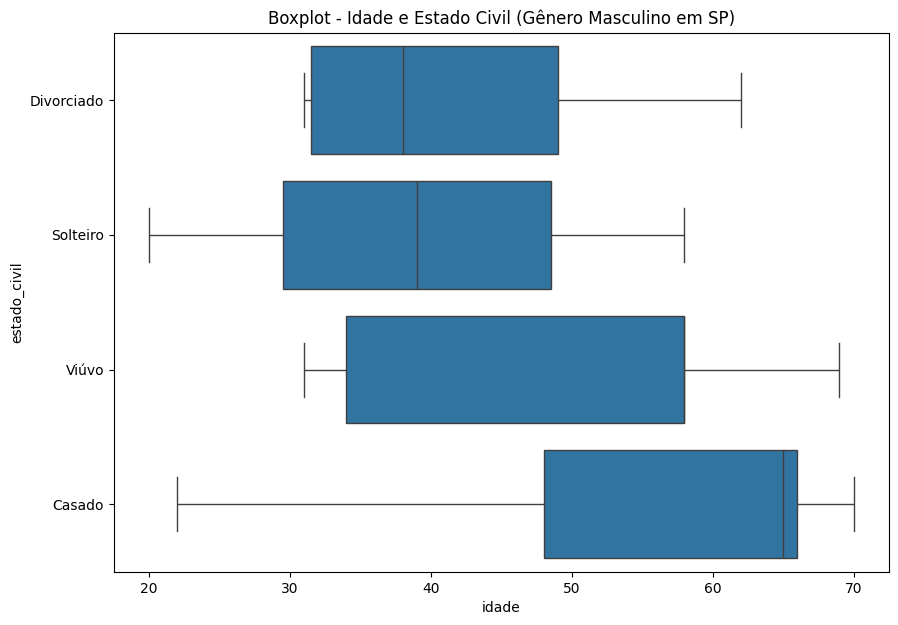

In [ ]:
#Elabore um gráfico de boxplot que represente a distribuição das idades dos clientes do gênero masculino residentes em São Paulo, classificados de acordo com seu estado civil.
# Filtrando os dados para clientes do gênero masculino residentes em São Paulo
df_sp_masculino = df[(df['genero'] == 'Masculino') & (df['cod_estado'] == 25)]

# Definindo o tamanho da figura
plt.figure(figsize=(10, 7))

# Criando o boxplot
sns.boxplot(data=df_sp_masculino, x='idade', y='estado_civil')

# Adicionando título ao gráfico
plt.title('Boxplot - Idade e Estado Civil (Gênero Masculino em SP)')

# Exibindo o gráfico
plt.show()


In [ ]:
display(df)

,ID_cliente,genero,genero_cod,escolaridade,escolaridade_cod,idade,estado_civil,estado_civil_cod,cod_estado,sigla,...,regiao_cod,pais,tipo_transacao_mais_frequente,tolerancia_risco,valor_investido,valor_investido_acoes,valor_investido_fii,valor_investido_dolar,valor_investido_renda_fixa,perfil
0,1,Masculino,1,Graduação,1,65.0,Viúvo,3,10,MA,...,1,Brasil,Investimentos,Baixa,971843,47473,581110,196765,146495,Conservador
1,125,Feminino,0,Ensino Médio,0,34.0,Solteiro,2,10,MA,...,1,Brasil,Pagamentos,Moderado,230462,26363,41852,133993,28254,Moderado
2,215,Feminino,0,Pós-graduação,2,45.0,Solteiro,2,10,MA,...,1,Brasil,Pagamentos,Alta,626013,72370,504895,32499,16249,Arrojado
3,220,Feminino,0,Pós-graduação,2,31.0,Casado,0,10,MA,...,1,Brasil,Pagamentos,Alta,206327,189532,11491,2786,2518,Arrojado
4,227,Masculino,1,Pós-graduação,2,65.0,Viúvo,3,10,MA,...,1,Brasil,Transferências,Moderado,939236,413134,65681,296206,164215,Moderado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,688,Masculino,1,Pós-graduação,2,46.0,Casado,0,13,MG,...,3,Brasil,Pagamentos,Alta,974602,893909,16966,32335,31392,Arrojado
1023,920,Masculino,1,Ensino Médio,0,26.0,Divorciado,1,13,MG,...,3,Brasil,Investimentos,Moderado,418011,235830,44044,116192,21945,Moderado
1024,973,Masculino,1,Pós-graduação,2,56.0,Viúvo,3,13,MG,...,3,Brasil,Pagamentos,Alta,969270,606894,29626,266241,66509,Arrojado
1025,974,Feminino,0,Ensino Médio,0,37.0,Viúvo,3,13,MG,...,3,Brasil,Investimentos,Alta,384086,377864,5019,826,377,Arrojado


<Axes: title={'center': 'Distribuição valor investido - Nordeste'}, xlabel='valor_investido_dolar', ylabel='Count'>

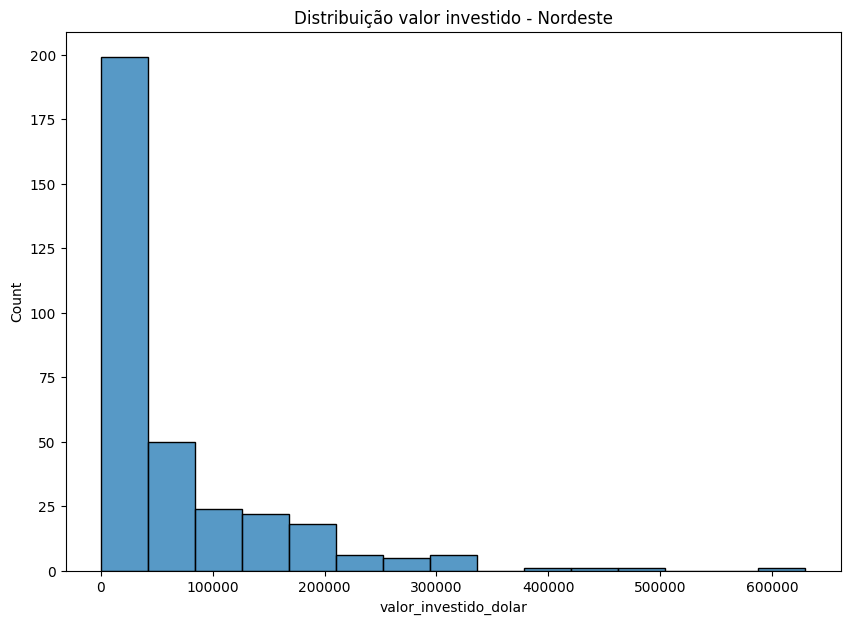

In [ ]:
#Construa um histograma que ilustre a distribuição dos valores investidos em dólar por clientes da região Nordeste. Configure o gráfico com 15 barras para proporcionar uma representação visual detalhada.
df_nordeste = df[(df['regiao'] == 'Nordeste')]

plt.figure(figsize=(10,7))
plt.title('Distribuição valor investido - Nordeste')
sns.histplot(data=df_nordeste,
             x = 'valor_investido_dolar',
             bins = 15
             )

In [ ]:
display(df)

,ID_cliente,genero,genero_cod,escolaridade,escolaridade_cod,idade,estado_civil,estado_civil_cod,cod_estado,sigla,...,regiao_cod,pais,tipo_transacao_mais_frequente,tolerancia_risco,valor_investido,valor_investido_acoes,valor_investido_fii,valor_investido_dolar,valor_investido_renda_fixa,perfil
0,1,Masculino,1,Graduação,1,65.0,Viúvo,3,10,MA,...,1,Brasil,Investimentos,Baixa,971843,47473,581110,196765,146495,Conservador
35,2,Masculino,1,Pós-graduação,2,39.0,Casado,0,5,BA,...,1,Brasil,Transferências,Moderado,20594,5369,4009,6662,4554,Moderado
82,3,Feminino,0,Pós-graduação,2,39.0,Divorciado,1,27,TO,...,2,Brasil,Investimentos,Moderado,617958,440851,63165,25113,88829,Arrojado
116,4,Feminino,0,Ensino Médio,0,36.0,Solteiro,2,9,GO,...,0,Brasil,Pagamentos,Alta,893161,621503,169623,2145,99890,Arrojado
160,5,Masculino,1,Ensino Médio,0,57.0,Solteiro,2,18,PI,...,1,Brasil,Transferências,Moderado,98889,29075,34819,18493,16502,Conservador
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,996,Feminino,0,Pós-graduação,2,50.0,Viúvo,3,9,GO,...,0,Brasil,Investimentos,Alta,670109,161442,431969,27405,49293,Arrojado
847,997,Masculino,1,Graduação,1,25.0,Viúvo,3,4,AM,...,2,Brasil,Investimentos,Moderado,596403,472022,101959,12610,9812,Arrojado
512,998,Masculino,1,Ensino Médio,0,41.0,Casado,0,23,RR,...,2,Brasil,Transferências,Alta,568498,112216,404784,18790,32708,Arrojado
623,999,Feminino,0,Pós-graduação,2,34.0,Casado,0,20,RN,...,1,Brasil,Investimentos,Alta,595688,359567,77974,112462,45685,Arrojado


In [ ]:
df.groupby(['perfil_cod'])['perfil_cod'].count()

perfil_cod
0    252
1    260
2    488
Name: perfil_cod, dtype: int64

In [ ]:
#Modelo quantitativo:
df2 = df[['genero_cod', 'escolaridade_cod', 'estado_civil_cod', 'regiao_cod', 'idade', 'valor_investido', 'valor_investido_acoes', 'valor_investido_fii', 'valor_investido_dolar', 'valor_investido_renda_fixa', 'perfil_cod']]
print(df2)

     genero_cod  escolaridade_cod  estado_civil_cod  regiao_cod  idade  \
0             1                 1                 3           1   65.0   
35            1                 2                 0           1   39.0   
82            0                 2                 1           2   39.0   
116           0                 0                 2           0   36.0   
160           1                 0                 2           1   57.0   
..          ...               ...               ...         ...    ...   
159           0                 2                 3           0   50.0   
847           1                 1                 3           2   25.0   
512           1                 0                 0           2   41.0   
623           0                 2                 0           1   34.0   
115           1                 1                 3           2   38.0   

     valor_investido  valor_investido_acoes  valor_investido_fii  \
0             971843                  47473

In [ ]:
#Separando o conjunto de dados features:
X_dados = df2.drop('perfil_cod', axis=1).values
X_dados

array([[1.00000e+00, 1.00000e+00, 3.00000e+00, ..., 5.81110e+05,
        1.96765e+05, 1.46495e+05],
       [1.00000e+00, 2.00000e+00, 0.00000e+00, ..., 4.00900e+03,
        6.66200e+03, 4.55400e+03],
       [0.00000e+00, 2.00000e+00, 1.00000e+00, ..., 6.31650e+04,
        2.51130e+04, 8.88290e+04],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 4.04784e+05,
        1.87900e+04, 3.27080e+04],
       [0.00000e+00, 2.00000e+00, 0.00000e+00, ..., 7.79740e+04,
        1.12462e+05, 4.56850e+04],
       [1.00000e+00, 1.00000e+00, 3.00000e+00, ..., 9.96470e+04,
        1.25735e+05, 6.72900e+03]])

In [ ]:
#Separando o target
y_dados = df2['perfil_cod'].values
y_dados

array([0, 1, 2, 2, 0, 2, 0, 0, 2, 1, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2,
       1, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 2,
       2, 2, 1, 1, 2, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 1, 1,
       2, 0, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2,
       2, 1, 1, 0, 1, 2, 2, 2, 2, 0, 2, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1, 0,
       2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 0, 2, 1, 1, 2,
       2, 2, 1, 0, 1, 0, 1, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 0, 0, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 0, 2, 1, 0, 0, 2,
       0, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 0, 2, 2,
       2, 0, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 1, 0, 2, 1, 2, 2, 1, 0, 1, 0, 2, 1, 2, 2, 2, 0,
       1, 1, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 0, 0,

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Função para balanceamento dos dados usando undersampling
def balanceamento_dados(X_dados, y_dados):
    under_sampler = RandomUnderSampler(random_state=42)
    X_balanceado, y_balanceado = under_sampler.fit_resample(X_dados, y_dados)
    return X_balanceado, y_balanceado

# Aplicando a técnica de balanceamento na base de dados
X_dados_balanceados, y_dados_balanceados = balanceamento_dados(X_dados, y_dados)

# Criando um novo DataFrame com os dados balanceados
df_balanceado = pd.DataFrame(X_dados_balanceados, columns=df2.columns[:-1])
df_balanceado['perfil_cod'] = y_dados_balanceados

# Verificando a contagem dos dados balanceados por classe
df_balanceado['perfil_cod'].value_counts()




perfil_cod
0    252
1    252
2    252
Name: count, dtype: int64

In [ ]:
df_balanceado.groupby(['perfil_cod'])['perfil_cod'].count()

perfil_cod
0    252
1    252
2    252
Name: perfil_cod, dtype: int64

In [ ]:
print(df_balanceado)


     genero_cod  escolaridade_cod  estado_civil_cod  regiao_cod  idade  \
0           1.0               1.0               3.0         1.0   65.0   
1           1.0               0.0               2.0         1.0   57.0   
2           0.0               0.0               2.0         0.0   47.0   
3           0.0               0.0               3.0         2.0   33.0   
4           0.0               0.0               2.0         2.0   20.0   
..          ...               ...               ...         ...    ...   
751         0.0               0.0               2.0         0.0   69.0   
752         0.0               0.0               3.0         2.0   60.0   
753         1.0               2.0               2.0         2.0   20.0   
754         1.0               0.0               3.0         1.0   37.0   
755         0.0               1.0               1.0         1.0   48.0   

     valor_investido  valor_investido_acoes  valor_investido_fii  \
0           971843.0                47473.0

In [ ]:
#Separando o conjunto de dados features:
X_dados_balanceados = df_balanceado.drop('perfil_cod', axis=1).values
X_dados

#Separando o target
y_dados_balanceados = df_balanceado['perfil_cod'].values
y_dados

def sep_treino_teste (X_dados_balanceados, y_dados_balanceados):
  X_train, X_test, y_train, y_test = train_test_split(X_dados_balanceados,
                                                      y_dados_balanceados,
                                                      random_state=42, test_size=0.2)
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = sep_treino_teste(X_dados_balanceados, y_dados_balanceados)

In [ ]:
classifier = RandomForestClassifier(random_state=42) #criação do classificador
modelo = classifier.fit(X_train, y_train) #modelo de classificação
y_predict = modelo.predict(X_test) #realização de predições no y predict

In [ ]:
pd.DataFrame(modelo.feature_importances_, columns=['importancia'],
             index=['genero_cod', 'escolaridade_cod', 'estado_civil_cod', 'regiao_cod', 'idade', 'valor_investido', 'valor_investido_acoes', 'valor_investido_fii', 'valor_investido_dolar', 'valor_investido_renda_fixa']).sort_values('importancia', ascending=False)


,importancia
valor_investido_acoes,0.239528
valor_investido_renda_fixa,0.221624
valor_investido_fii,0.156562
valor_investido_dolar,0.151744
valor_investido,0.096885
idade,0.054812
regiao_cod,0.025990
estado_civil_cod,0.023813
escolaridade_cod,0.018832
genero_cod,0.010210


In [ ]:
#calculo acuracia do modelo
acuracia = accuracy_score(y_test, y_predict)
print('Precisão', acuracia)

Precisão 0.7960526315789473


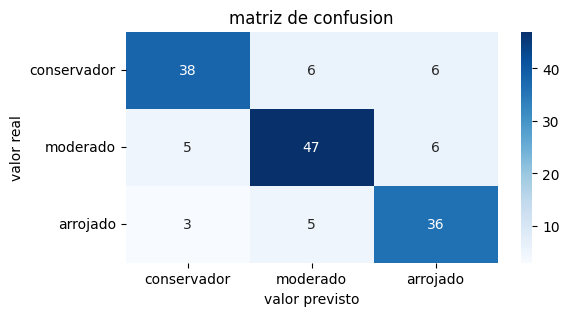

In [ ]:
cm = confusion_matrix (y_test, y_predict)
labels=['conservador', 'moderado', 'arrojado']
plt.figure(figsize=(6,3))
sns.heatmap(data=cm,
            annot=True,
            cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel('valor previsto')
plt.ylabel('valor real')
plt.title('matriz de confusion')
plt.show()

In [ ]:
#metricas
report = classification_report(y_test,y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        50
           1       0.81      0.81      0.81        58
           2       0.75      0.82      0.78        44

    accuracy                           0.80       152
   macro avg       0.80      0.80      0.79       152
weighted avg       0.80      0.80      0.80       152

